In [36]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Sentiment analysing libraries
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [24]:
#Load the dataset

comments_df = pd.read_csv(r'C:\Users\Rohan V\Documents\1-Youtube Text Data Analysis\UScomments.csv',error_bad_lines=False)
comments_df.head(10)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Rohan V\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [25]:
#Basic data cleaning

comments_df.isna().sum()
comments_df.dropna(inplace=True)

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [28]:
#Calculating sentiment and adding it back to the dataframe

polarity = []

for i in comments_df['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)
comments_df['polarity'] = polarity

In [29]:
comments_df.head(20)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [38]:
#Wordcloud Representation for positive sentiment

comments_positive_df = comments_df[comments_df['polarity'] == 1]
comments_positive_df.shape
comments_positive_df.head(10)

#Initialising Stopwords
stopwords = set(STOPWORDS)

#Combining the positive statements into a single string
compiled_comments = ' '.join(comments_positive_df['comment_text'])

#Initialising the wordcloud
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(compiled_comments)

(-0.5, 999.5, 499.5, -0.5)

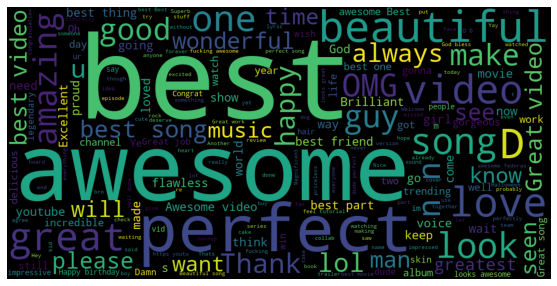

In [40]:
#Displaying the Wordcloud

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [41]:
#Wordcloud Representation for negative sentiment

comments_negative_df = comments_df[comments_df['polarity'] == -1]
comments_negative_df.shape
comments_negative_df.head(10)

#Initialising Stopwords
stopwords = set(STOPWORDS)

#Combining the positive statements into a single string
compiled_comments = ' '.join(comments_negative_df['comment_text'])

#Initialising the wordcloud
wordcloud = WordCloud(width=1000,height=500,stopwords=stopwords).generate(compiled_comments)

(-0.5, 999.5, 499.5, -0.5)

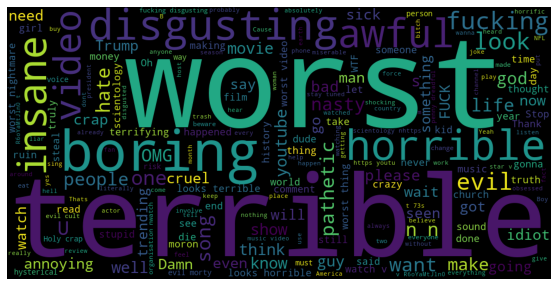

In [42]:
#Displaying the Wordcloud

plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')